## 1. 考虑 Rossler 化学反应方程
$$ \left\{
    \begin{align} % \begin{eqnarray}好像也可以。
    x'&=-y-z\\
    y'&=x+ay, x(0)=y(0)=z(0)=d\\
    z'&=(x-c)z+b
    \end{align}
    \right.$$
### 将 a, b, c, d 设为参数，编程求数值解。取$a=0.2,b=0.8,c=4.5,d=1$，绘制数值解的三维相轨迹，并作出在$xOy$平面上的投影

### 解：编写Rossler函数，以a，b，c，d作为参数，返回解；
### 三维相轨迹通过x,y,z给出，$xOy$平面上的投影通过x,y给出。

In [1]:
using Plots
using DifferentialEquations
a=0.2
b=0.8
c=4.5
d=1
function Rossler(a,b,c,d)
    function rosssler(u,p,t)
     dx = -u[2]-u[3]
     dy = u[1]+u[4]*u[2]
     dz = (u[1]-u[6])*u[3]+u[5]
     da=0
     db=0
     dc=0
     [dx,dy,dz,da,db,dc]
    end
    u0 = [d;d;d;a;b;c]
    tspan = (0.0,100.0)
    prob = ODEProblem(rosssler,u0,tspan)
    return prob
end

Rossler (generic function with 1 method)

In [2]:
prob=Rossler(a,b,c,d)

ODEProblem with uType Array{Float64,1} and tType Float64. In-place: false
timespan: (0.0, 100.0)
u0: [1.0, 1.0, 1.0, 0.2, 0.8, 4.5]

In [3]:
sol=solve(prob,Tsit5())

retcode: Success
Interpolation: specialized 4th order "free" interpolation
t: 291-element Array{Float64,1}:
   0.0                
   0.07926520725179723
   0.19180646690650283
   0.318397512114336  
   0.4677119229789366 
   0.6309310060248534 
   0.8100172425428399 
   1.0062962195203573 
   1.2206580228351211 
   1.4579595558572909 
   1.722979666258691  
   2.0221576333293716 
   2.3619853888448707 
   ⋮                  
  97.36262234119474   
  97.73545928094465   
  97.99412203857753   
  98.23885815462974   
  98.45057610909458   
  98.66471929090989   
  98.88060339257514   
  99.11468157682697   
  99.36937477570399   
  99.65632955054001   
  99.99442569917696   
 100.0                
u: 291-element Array{Array{Float64,1},1}:
 [1.0, 1.0, 1.0, 0.2, 0.8, 4.5]                  
 [0.845731, 1.08968, 0.808228, 0.2, 0.8, 4.5]    
 [0.638024, 1.19886, 0.6027, 0.2, 0.8, 4.5]      
 [0.414219, 1.29703, 0.443806, 0.2, 0.8, 4.5]    
 [0.157293, 1.37969, 0.324901, 0.2, 0.8, 4.5]    
 [

### 三维相轨迹图如下

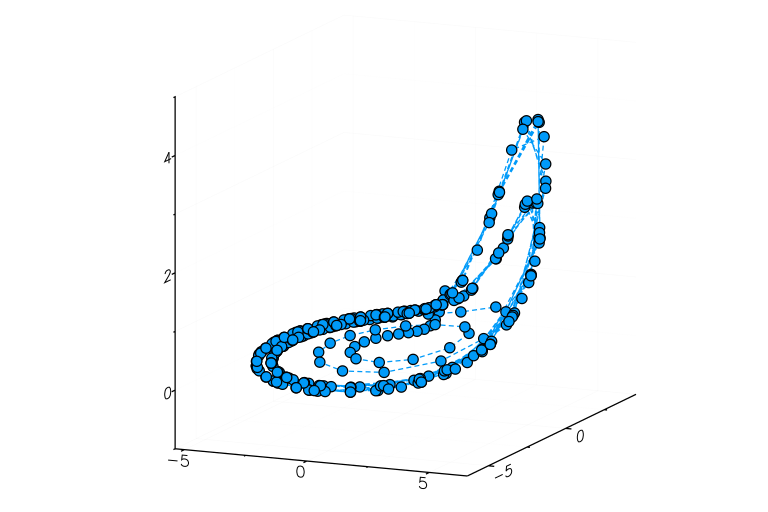

In [4]:
plot(sol[1,:], sol[2,:], sol[3,:], markershape=(:circle),line =(:arrow),linestyle=(:dash),dpi=128,legend=:none)

In [5]:
### xOy投影图如下

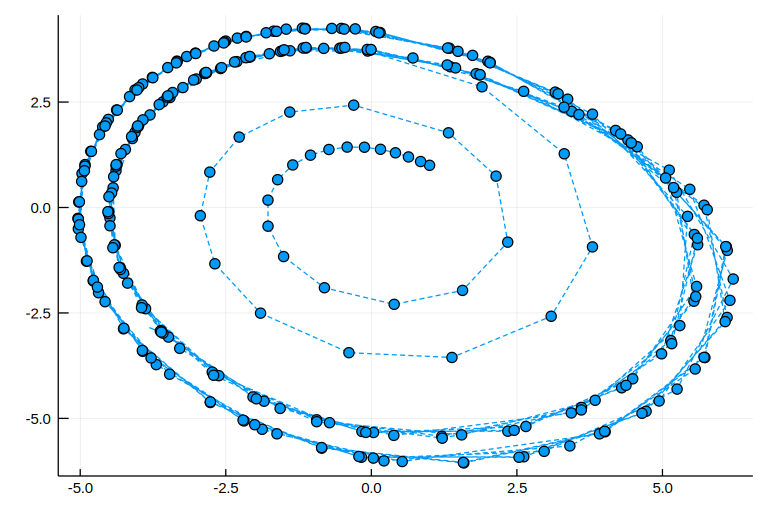

In [6]:
plot(sol[1,:], sol[2,:], markershape=(:circle),line =(:arrow),linestyle=(:dash),dpi=128,legend=:none)

### 第四题MATLAB中的ode45原理未知，不过同样的方程可在如下链接中显示，有直接的求解方法。
### https://tutorials.juliadiffeq.org/html/advanced/02-advanced_ODE_solving.html